# Задание 3. Ансамбли алгоритмов. Эксперименты.
### Матвеев Артем, 317 группа

In [1]:
import sys
sys.path.append('../src')

In [2]:
from ensembles import RandomForestMSE, GradientBoostingMSE
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'svg'
import pandas as pd

%load_ext autoreload
%autoreload 2

1. Чтение данных и описание признаков

In [13]:
from sklearn.model_selection import train_test_split


df_data = df_data.drop(['id', 'date'], axis=1)
train, test = train_test_split(df_data, test_size=0.2)
train, val = train_test_split(train, test_size=0.3)
print(train.shape, val.shape, test.shape)

(12103, 19) (5187, 19) (4323, 19)


In [14]:
train.to_csv('train.csv', index=False)
val.to_csv('val.csv', index=False)
test = test.drop(['price'], axis=1)
test.to_csv('test.csv', index=False)

In [15]:
model = RandomForestMSE(n_estimators=100)
model.fit(train.drop(['price'], axis=1).values, train['price'].values)

In [3]:
df_data = pd.read_csv('../data/kc_house_data.csv')
print(f'Data shape: {df_data.shape}')
df_data.head()

Data shape: (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

2. Пропущенные и уникальные значения. Типы признаков.

In [4]:
print(df_data.isnull().sum(axis=0))

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [5]:
print(df_data.nunique())

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64


In [6]:
print(df_data.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


* Видим, что признак id для каждого объекта уникальный и представляет из себя просто индекс дома, поэтому он не информативный и его можно выкинуть
* Также видим, что в данных совсем нет пропущенных значений, что упрощает их обработку

In [7]:
df_data = df_data.drop(['id'], axis=1)

3. Распределение цены

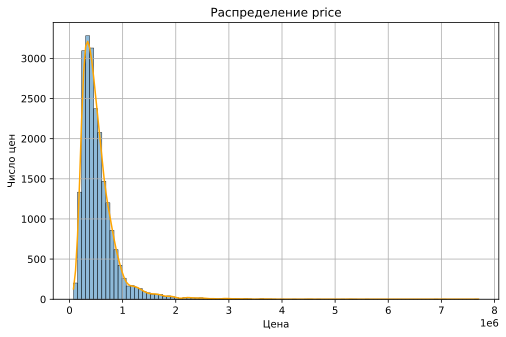

In [8]:
import seaborn as sns


fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.set_title('Распределение price')
ax.set_xlabel('Цена')
ax.set_ylabel('Число цен')
sns.histplot(df_data['price'], kde=True, ax=ax, bins=100)
ax.lines[0].set_color('orange')
ax.grid()
plt.show()

* Получили распределение с тяжелым правым хвостом. Распределение похоже на лог-нормальное. Проверим:

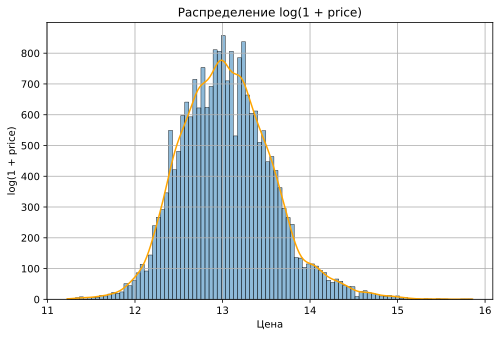

In [9]:
df_data['log_price'] = np.log1p(df_data['price'].values)
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.set_title('Распределение log(1 + price)')
ax.set_xlabel('Цена')
ax.set_ylabel('log(1 + price)')
sns.histplot(df_data['log_price'], kde=True, ax=ax, bins=100)
ax.lines[0].set_color('orange')
ax.grid()
plt.show()

* Значит можно будет рассмотреть предсказывание не цена, а логарифма цены

Преобразуем дату в pd.datetime и добавим колонки с годом покупки, месяцем покупки и день недели покупки

In [10]:
df_data['date'] = pd.to_datetime(df_data['date'])
for time in ['year', 'month', 'dayofweek', 'day']:
    df_data[time] = getattr(df_data['date'].dt, time)

4. Разделение на обучающую и контрольную выборки. 

In [94]:
from sklearn.model_selection import train_test_split

df_train, df_val = train_test_split(df_data, test_size=0.3, shuffle=True)
y_train = df_train['price'].values
y_val = df_val['price'].values
print(f'Train shape: {df_train.shape}')
print(f'Val shape: {df_val.shape}')

Train shape: (15129, 25)
Val shape: (6484, 25)


5. Удаление выбросов

In [12]:
# mask = (y_train <= np.quantile(y_train, 0.999))
# df_train = df_train.iloc[mask]
# y_train = y_train[mask]

6. Числовые и категориальные признаки. Пайплайн обработки данных.

* К категориальным признакам (признаки, на которых трудно ввести метрику или отношение порядка) точно можно отнести: **waterfront**, **zipcode** (система почтовых индексов - дорогие дома находятся рядом, поэтому у них примерно один почтовый индекс), **dayofweek**, **month**
* К числовым признакам, которые будут рассмотрены на первом этапе: **year, yr_built, yr_renovated, lat, long, bedrooms, bathrooms, sqft_living, sqft_lot, floors, view, condition, grade, sqft_above, sqft_basement, sqft_living15, sqft_lot15**

In [95]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

categorical = ['waterfront', 'zipcode']
numeric_features = ['dayofweek', 'month',   ]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical), 
    ('scaling', SimpleImputer(), numeric_features)
])

X_train = column_transformer.fit_transform(df_train)
X_val = column_transformer.transform(df_val)
print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')

X_train shape: (15129, 90)
X_val shape: (6484, 90)


### Случайный лес

In [99]:
randomForest = RandomForestMSE(n_estimators=100)
historyRF = randomForest.fit(X_train, y_train, X_val, y_val, trace=True)

(99, 123205.94618313911)


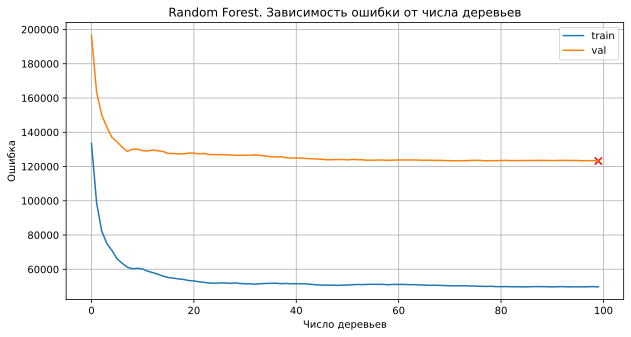

In [102]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x=historyRF['best_pair'][0], y=historyRF['best_pair'][1], marker='x', color='red', s=50)
ax.plot(historyRF['score_train'], label='train')
ax.plot(historyRF['score_val'], label='val')
ax.set_title('Random Forest. Зависимость ошибки от числа деревьев')
ax.grid()
ax.legend()
ax.set_xlabel('Число деревьев')
ax.set_ylabel('Ошибка')
fig.show()
print(historyRF['best_pair'])

* После 141 дерева наблюдается переобучение

In [250]:
from tqdm import tqdm


n_estimators = historyRF['best_pair'][0] + 1
number_of_features = [10, 30, 50, 70, 90, X_train.shape[1]]
histories = dict()

for n_features in tqdm(number_of_features):
    randomForest = RandomForestMSE(n_estimators=n_estimators, feature_subsample_size=n_features)
    histories[n_features] = randomForest.fit(X_train, y_train, X_val, y_val, trace=True)

100%|██████████| 6/6 [02:35<00:00, 25.91s/it]


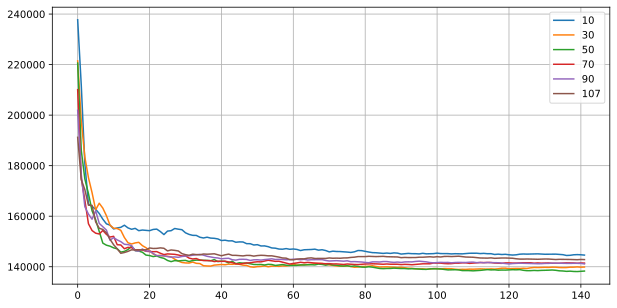

In [252]:
plt.figure(figsize=(10, 5))
for n_features in number_of_features:
    plt.plot(histories[n_features]['score_val'], label=str(n_features))
plt.legend()
plt.grid()
plt.show()

* Лучшим оказалось feature_subsample_size=50

In [ ]:
from tqdm import tqdm


n_estimators = historyRF['best_pair'][0] + 1
number_of_features = [10, 30, 50, 70, 90, X_train.shape[1]]
histories = dict()

for n_features in tqdm(number_of_features):
    randomForest = RandomForestMSE(n_estimators=n_estimators, feature_subsample_size=n_features)
    histories[n_features] = randomForest.fit(X_train, y_train, X_val, y_val, trace=True)

### Градиентный бустинг

In [152]:
gradientBoosting = GradientBoostingMSE(n_estimators=100)
historyGB = gradientBoosting.fit(X_train, y_train, X_val, y_val, trace=True)

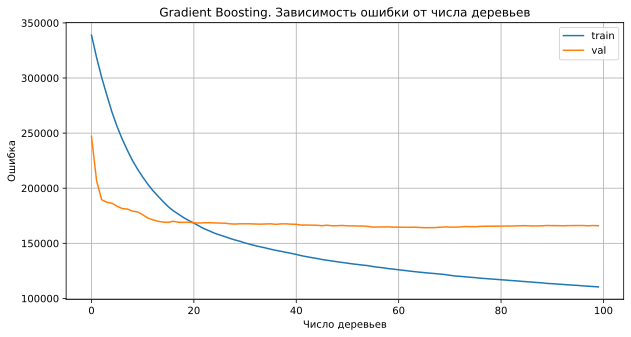

In [153]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(historyGB['score_train'], label='train')
ax.plot(historyRF['score_val'], label='val')
ax.set_title('Gradient Boosting. Зависимость ошибки от числа деревьев')
ax.grid()
ax.legend()
ax.set_xlabel('Число деревьев')
ax.set_ylabel('Ошибка')
fig.show()

# Сделай
* Нормальное EDA: там признаки по координатам есть и все такое
* Удаление выбросов сделай